## Digits Dataset

#### Load digits dataset from scikit learn 

In [16]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
digits.data.shape

(1797, 64)

In [18]:
digits.target.shape

(1797,)

### Showing the Images and Labels (Digits Dataset)

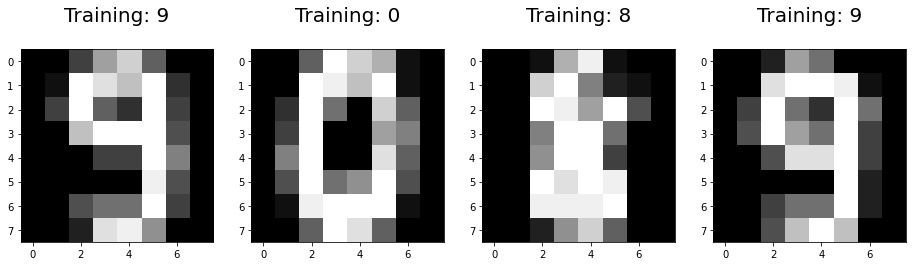

In [19]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[1792:1796], digits.target[1792:1796])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Splitting the data into training and test

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.20,random_state=10)

### Scikit-learn 4-step Modelling Pattern

Step1.Import the model we want to use (In this case Logistic Regression)

In [21]:
from sklearn.linear_model import LogisticRegression

Step2. Make an instance of the Model

In [26]:
logisticRegr = LogisticRegression(solver='liblinear', max_iter=100)

Step3. Training the model on the data, storing the information learned from the data

In [27]:
logisticRegr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

Step4.Predict the labels of new data (images)

In [30]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([5])

In [32]:
x_test.shape

(360, 64)

In [33]:
#predict for multiple observations (images) at once
logisticRegr.predict(x_test[0:10])

array([5, 2, 5, 4, 1, 2, 4, 3, 3, 0])

In [36]:
# Model predictions on entire test dataset
predictions = logisticRegr.predict(x_test)

### Measuring Model Performance

In [45]:
#Accuracy score is calculated
score = logisticRegr.score(x_test,y_test)
print(score)

0.9583333333333334


In [46]:
from sklearn import metrics
score1 = metrics.accuracy_score(predictions,y_test)
print(score1)

0.9583333333333334


### Confusion Matrix

A confusion matrix is a table that is used to describe the performance of a classification model on a set of test data for which true values are known.

In [48]:
import numpy as np
import seaborn as sns
from sklearn import metrics

##### Method using Seaborn

In [51]:
cm = metrics.confusion_matrix(y_test,predictions)

In [52]:
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  2  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  0  0]
 [ 0  2  0  0 31  0  0  0  1  0]
 [ 0  1  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  0  0 39  0  0]
 [ 0  2  1  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  0  3 35]]


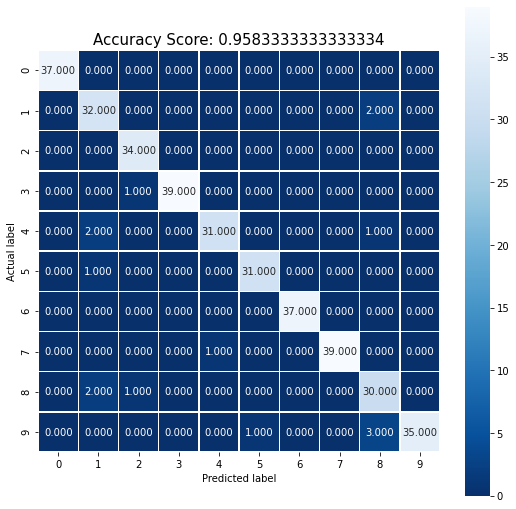

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('sapein_digits.png')
#plt.show();

##### Method using Matplotlib

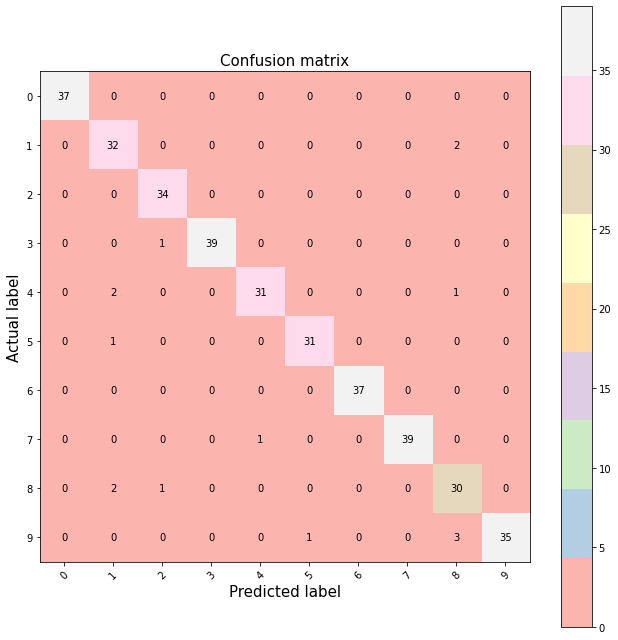

In [59]:

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('sapien_Digits_ConfusionMatplotlib.png')
#plt.show()

### Dimensionality reduction using PCA

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [69]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


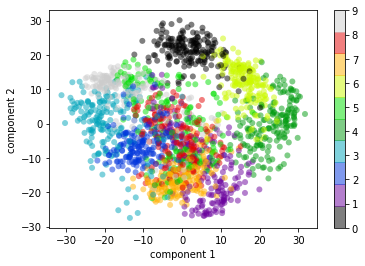

In [79]:
plt.scatter(projected[:,0],projected[:,1],
           c=digits.target,edgecolor='none',alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

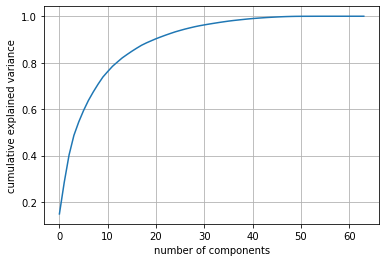

In [84]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

#### 29 components required to get variance of 95%

In [158]:
# Lets try 95% of variance to maitain, how many components are required
pca1 = PCA(0.95).fit(digits.data)
pca1.n_components_

29

In [159]:
# Total components in the initial PCA
pca.n_components_

64

In [160]:
projected1 = pca1.fit_transform(digits.data)
print(digits.data.shape)
print(projected1.shape)

(1797, 64)
(1797, 29)


In [161]:
digits.data 

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [162]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [163]:
projected1

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [164]:
projected1.shape

(1797, 29)

In [165]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(projected1, digits.target,test_size=0.20,random_state=10)

In [166]:
logisticRegr1 = LogisticRegression(solver='liblinear', max_iter=100)

In [167]:
logisticRegr1.fit(x_train1,y_train1)

LogisticRegression(solver='liblinear')

In [168]:
# Model predictions on entire test dataset
predictions1 = logisticRegr1.predict(x_test1)

In [169]:
#Accuracy score is calculated
score1 = logisticRegr1.score(x_test1,y_test1)
print(score)

0.9583333333333334


In [170]:
cm1 = metrics.confusion_matrix(y_test1,predictions1)

In [171]:
cm1

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  3,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

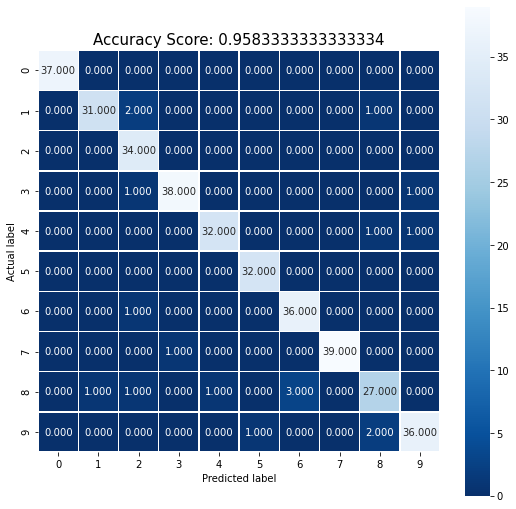

In [172]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('sapein_digits1.png')
#plt.show();